In [1]:
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import griddata

In [2]:
output_path = Path('outputs_lab4')

task_data = {}

for output in output_path.iterdir():
    if ".pkl" not in output.name:
        continue

    name_parts = output.name.split('_')
    representation = name_parts[0]

    with open(output, 'rb') as f:
        task_data[representation] = pickle.load(f)

In [3]:
color_pallet = sns.color_palette(n_colors=len(task_data))
representation_colors = dict(zip(task_data.keys(), color_pallet))

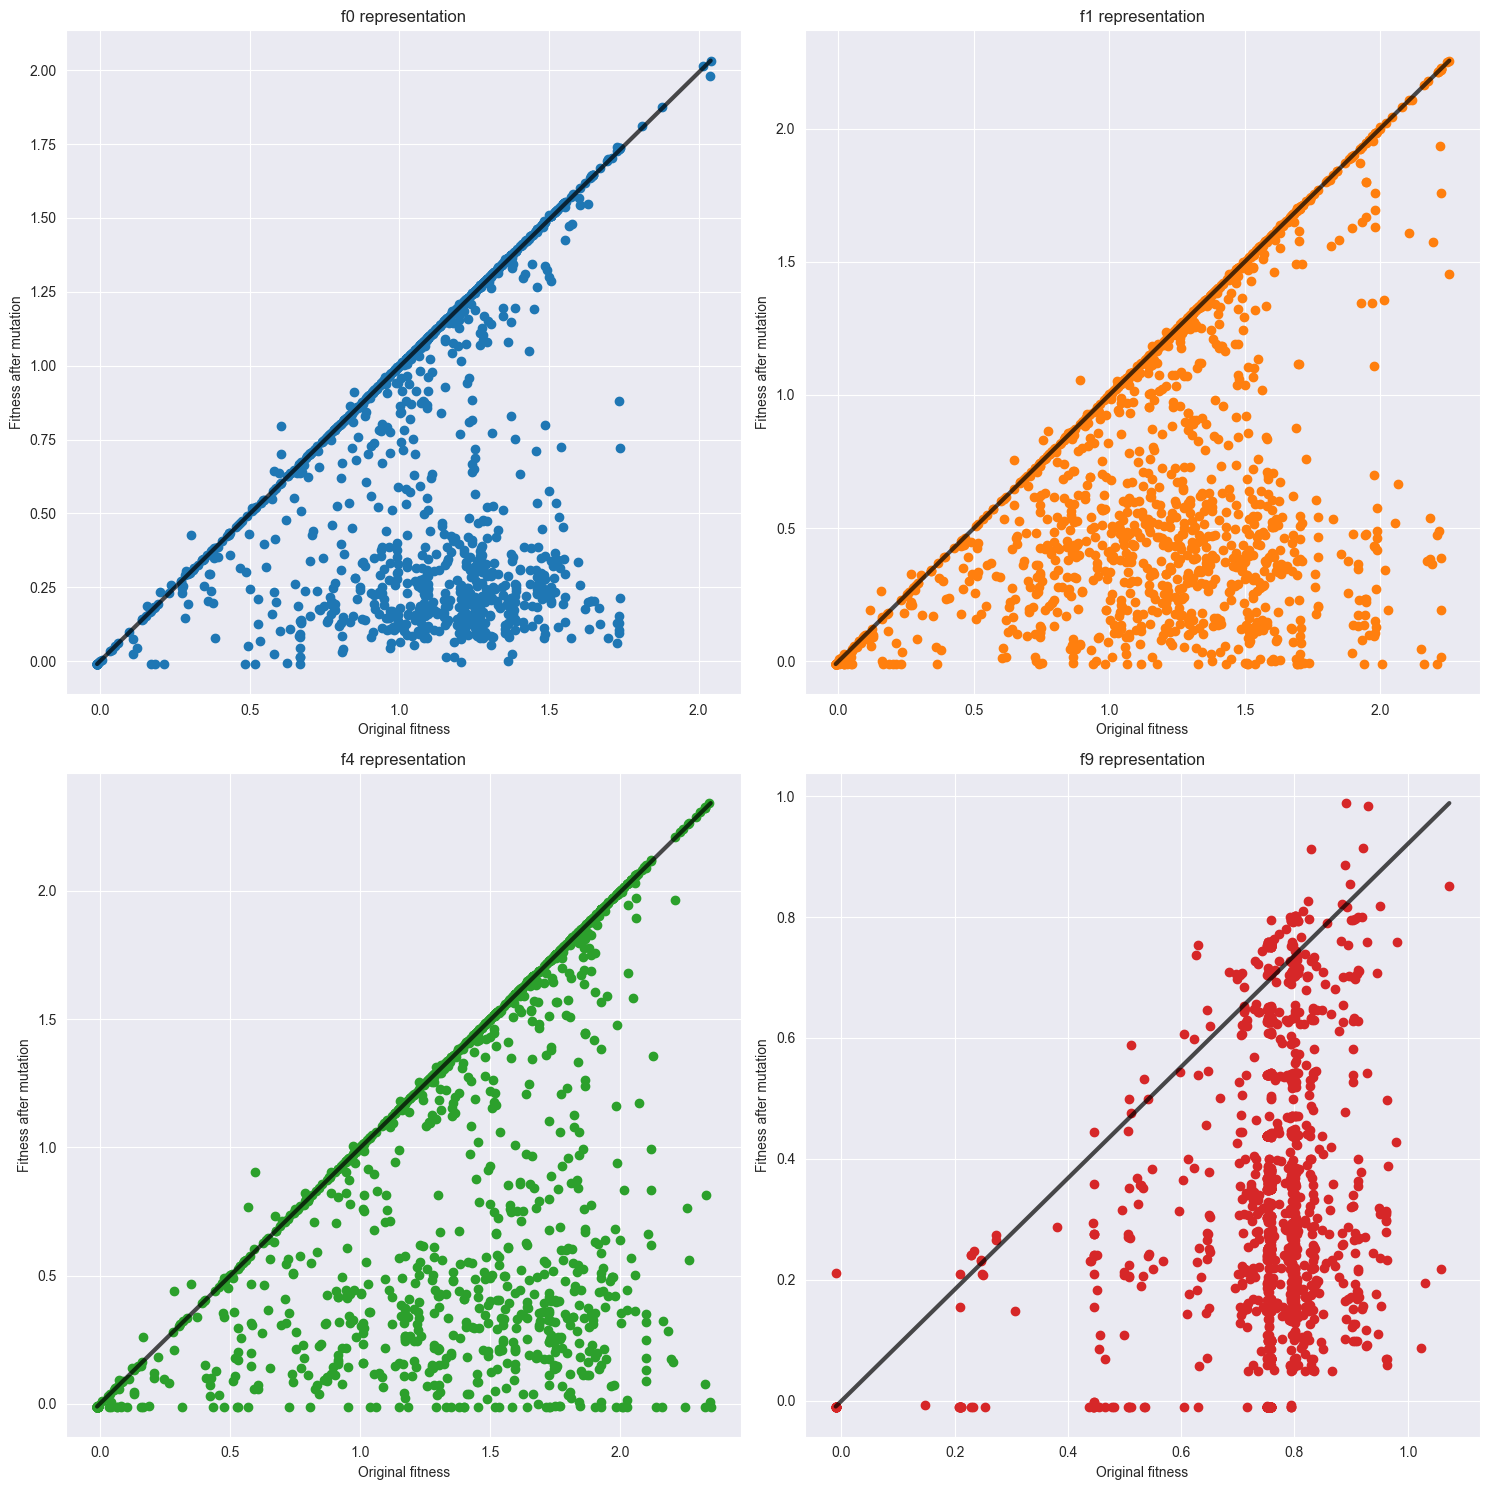

In [4]:
fig = plt.figure(figsize = (15,15))

i = 1

for r in task_data.keys():
    ax = fig.add_subplot(2,2,i)
    i += 1

    ax_data = task_data[r]['task1']

    ax.scatter(ax_data['mutated_pre_fitness'], ax_data['mutated_fitness'], color=representation_colors[r])

    ax.plot([np.min(ax_data['mutated_pre_fitness']), np.max(ax_data['mutated_pre_fitness'])], [np.min(ax_data['mutated_fitness']), np.max(ax_data['mutated_fitness'])], color="black", linewidth=3, alpha=0.7)
    ax.set_title(f"f{r} representation")
    ax.set_xlabel("Original fitness")
    ax.set_ylabel("Fitness after mutation")

fig.tight_layout()


In [5]:
from collections import defaultdict
from sklearn.cluster import DBSCAN


def distance_based_average(parent1_fitness, parent2_fitness, crossover_fitness,
                          eps=0.1, min_samples=2):
    """Average points within distance threshold using DBSCAN clustering"""

    # Prepare data for clustering
    X = np.column_stack([parent1_fitness, parent2_fitness])

    # Perform clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = clustering.labels_

    # Group points by cluster
    clusters = defaultdict(list)
    for i, label in enumerate(labels):
        clusters[label].append(i)

    # Calculate averages for each cluster
    avg_parent1, avg_parent2, avg_crossover, counts = [], [], [], []

    for label, indices in clusters.items():
        if label == -1:  # Noise points (not clustered)
            # Keep individual noise points
            for idx in indices:
                avg_parent1.append(parent1_fitness[idx])
                avg_parent2.append(parent2_fitness[idx])
                avg_crossover.append(crossover_fitness[idx])
                counts.append(1)
        else:
            # Average clustered points
            avg_parent1.append(np.mean([parent1_fitness[i] for i in indices]))
            avg_parent2.append(np.mean([parent2_fitness[i] for i in indices]))
            avg_crossover.append(np.mean([crossover_fitness[i] for i in indices]))
            counts.append(len(indices))

    return np.array(avg_parent1), np.array(avg_parent2), np.array(avg_crossover), np.array(counts)

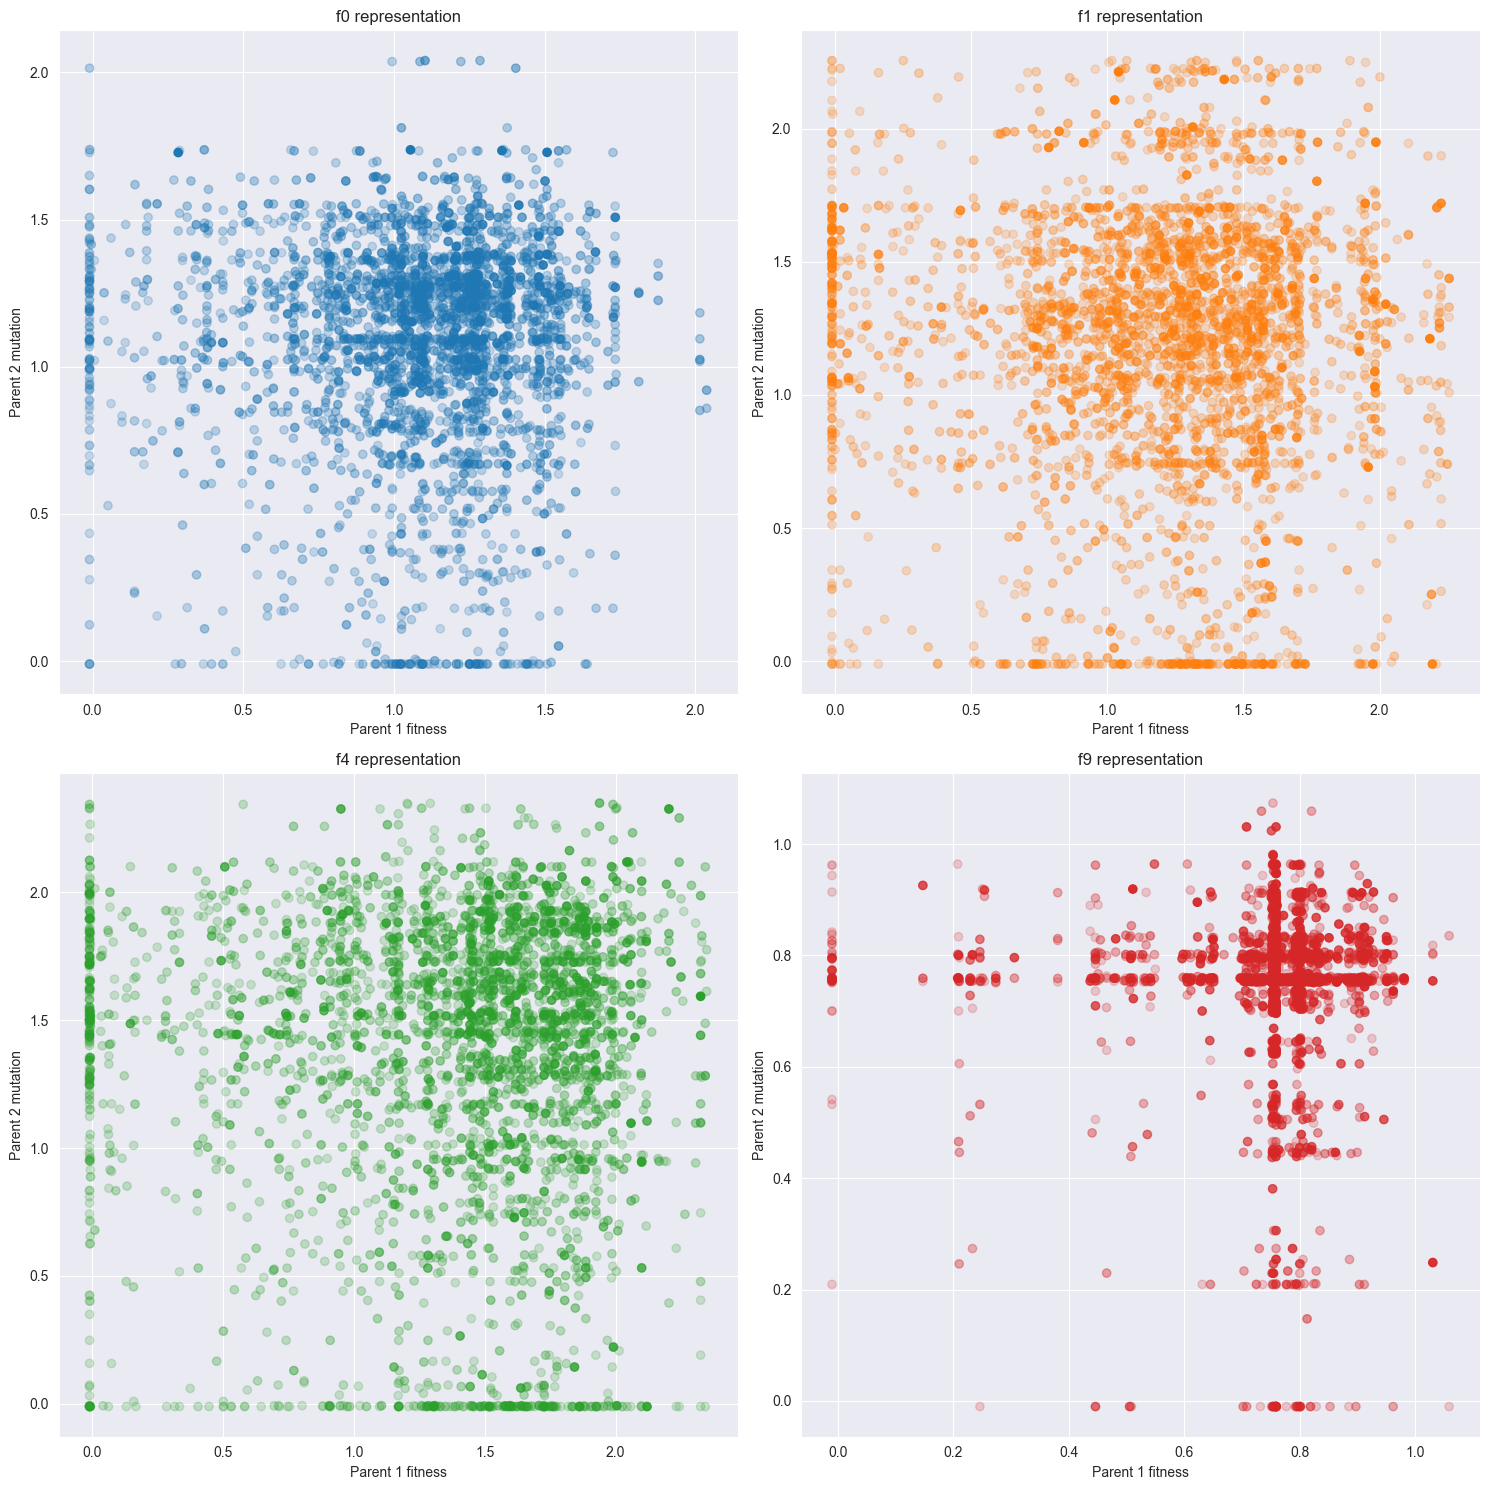

In [6]:
fig = plt.figure(figsize = (15,15))

i = 1

for r in task_data.keys():
    ax = fig.add_subplot(2,2,i)
    i += 1

    ax_data = task_data[r]['task2']
    x, y, z = np.array(ax_data['p1_fitness'])[0::7], np.array(ax_data['p2_fitness'])[0::7], np.array(ax_data['crossover_fitness'])[0::7]

    z = (z - np.min(z))/np.ptp(z)
    z = (z * 0.8) + 0.2

    plt.scatter(x, y, alpha=z, color=representation_colors[r])


    # z = (z - np.min(z))/np.ptp(z)
    # z *= 0.8
    # z += 0.2
    #
    # ax.scatter(x, y, alpha=z)
    #
    ax.set_title(f"f{r} representation")
    ax.set_xlabel("Parent 1 fitness")
    ax.set_ylabel("Parent 2 mutation")

fig.tight_layout()


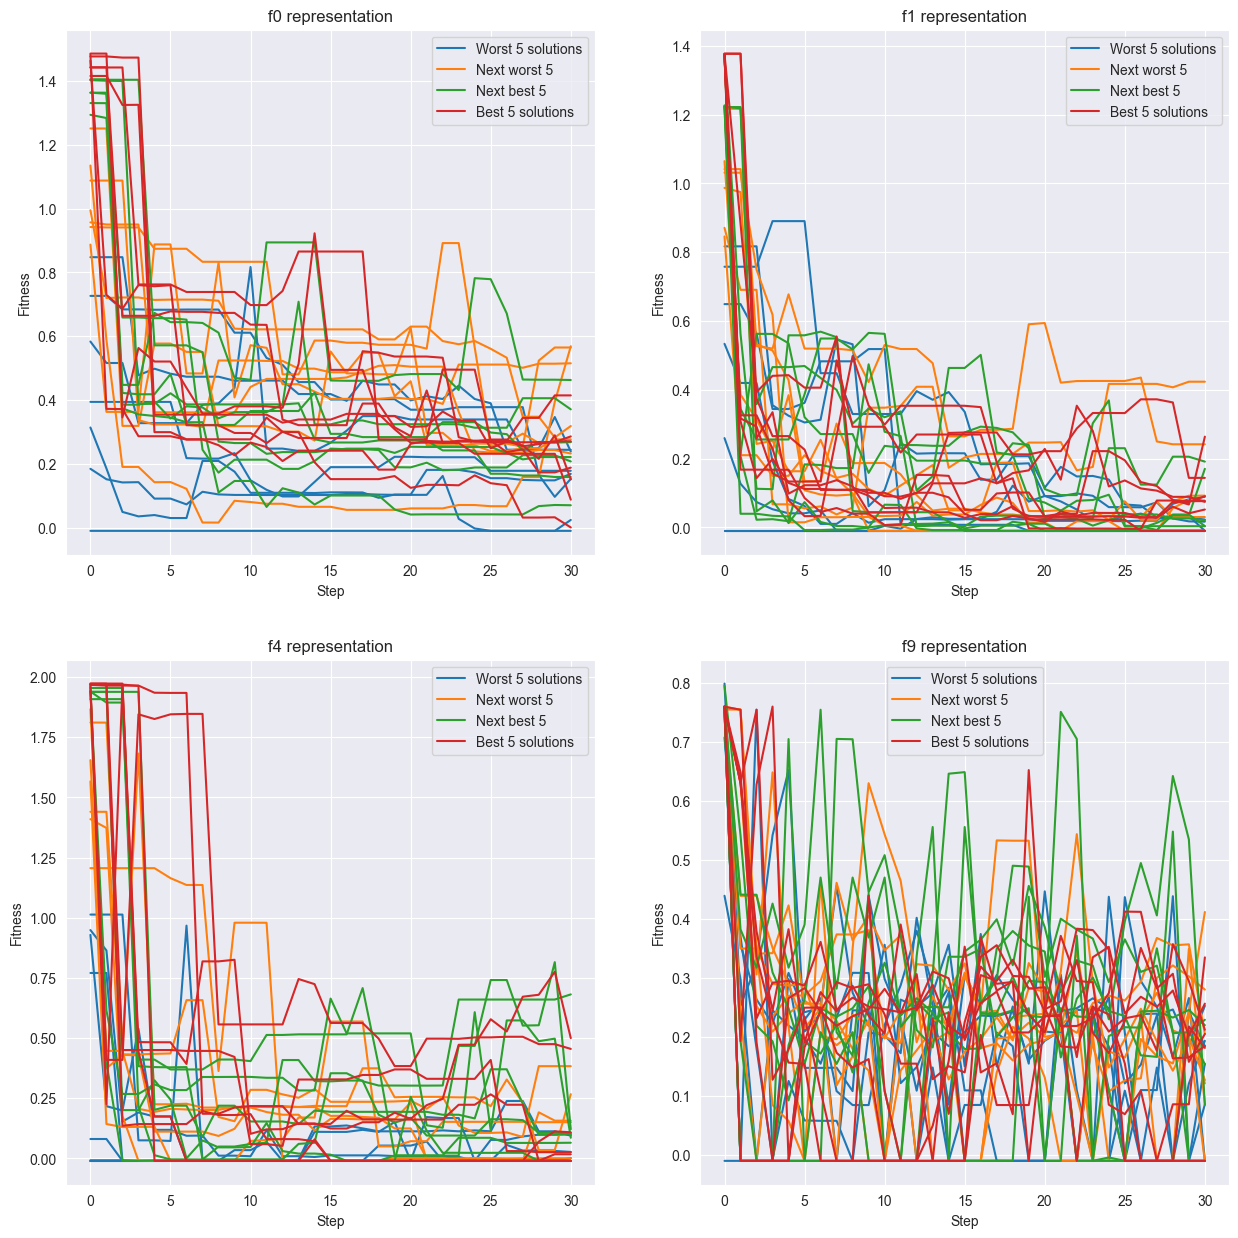

In [36]:
group_size = len(task_data['0']['task3']['random_walk_fitness']) // 4

group_names = [
    "Worst 5 solutions",
    "Next worst 5",
    "Next best 5",
    "Best 5 solutions"
]

cp = sns.color_palette(n_colors=len(group_names))
gc = dict(zip(group_names, cp))

labels = []

for g in group_names:
    labels.extend([g] * group_size )

fig = plt.figure(figsize = (15,15))

i = 1

for r in task_data.keys():
    ax = fig.add_subplot(2,2,i)
    i += 1

    data = task_data[r]['task3']['random_walk_fitness'][:group_size * 4]

    j = 0

    for d in data:
        ax.plot(d, label=labels[j], color=gc[labels[j]])
        j += 1

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())


    ax.set_title(f"f{r} representation")
    ax.set_xlabel("Step")
    ax.set_ylabel("Fitness")


In [42]:
data = {}

representations = []

for f in output_path.iterdir():
    if ".csv" not in f.name:
        continue

    name_split = f.name.split('_')
    representation = name_split[1]

    if representation not in representations:
        representations.append(representation)

    combined_type = representation
    if combined_type not in data:
        data[combined_type] = {
            'std': [],
            'max': [],
            'runtime': []
        }

    run_data = pd.read_csv(f)

    data[combined_type]['std'].append(run_data.stdev.to_numpy())
    data[combined_type]['max'].append(run_data['max'].to_numpy())
    data[combined_type]['runtime'].append(run_data['runtime'][0])


{'0': {'std': [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.24876746e-14,
       1.39883242e-06, 1.20899416e-02, 2.09059394e-02, 4.35270386e-02,
       5.65336394e-02, 7.13416418e-02, 6.64431947e-02, 7.38739701e-02,
       8.34487590e-02, 8.37362617e-02, 8.83562517e-02, 9.20412099e-02,
       8.17846380e-02, 7.84977987e-02, 5.70584454e-02, 8.12863115e-02,
       7.68259837e-02, 6.24071238e-02, 7.87143819e-02, 7.23394871e-02,
       9.06698427e-02, 6.00118857e-02, 1.11359640e-01, 8.17842753e-02,
       7.38058066e-02, 8.95640815e-02, 9.18669257e-02, 9.02215779e-02,
       1.00108978e-01, 8.91445651e-02, 1.13759594e-01, 8.37575423e-02,
       9.95931305e-02, 1.23475451e-01, 1.17095228e-01, 1.30134544e-01,
       1.57849313e-01, 1.65166768e-01, 1.70387327e-01, 1.77614418e-01,
       1.96539062e-01, 1.96235929e-01, 1.78394198e-01, 2.01756002e-01,
       1.70847698e-01, 1.91035037e-01, 2.01777594e-01, 2.02393657e-01,
       2.27540020e-01, 2.34449260e-01, 2.44337743e-01, 2.26861

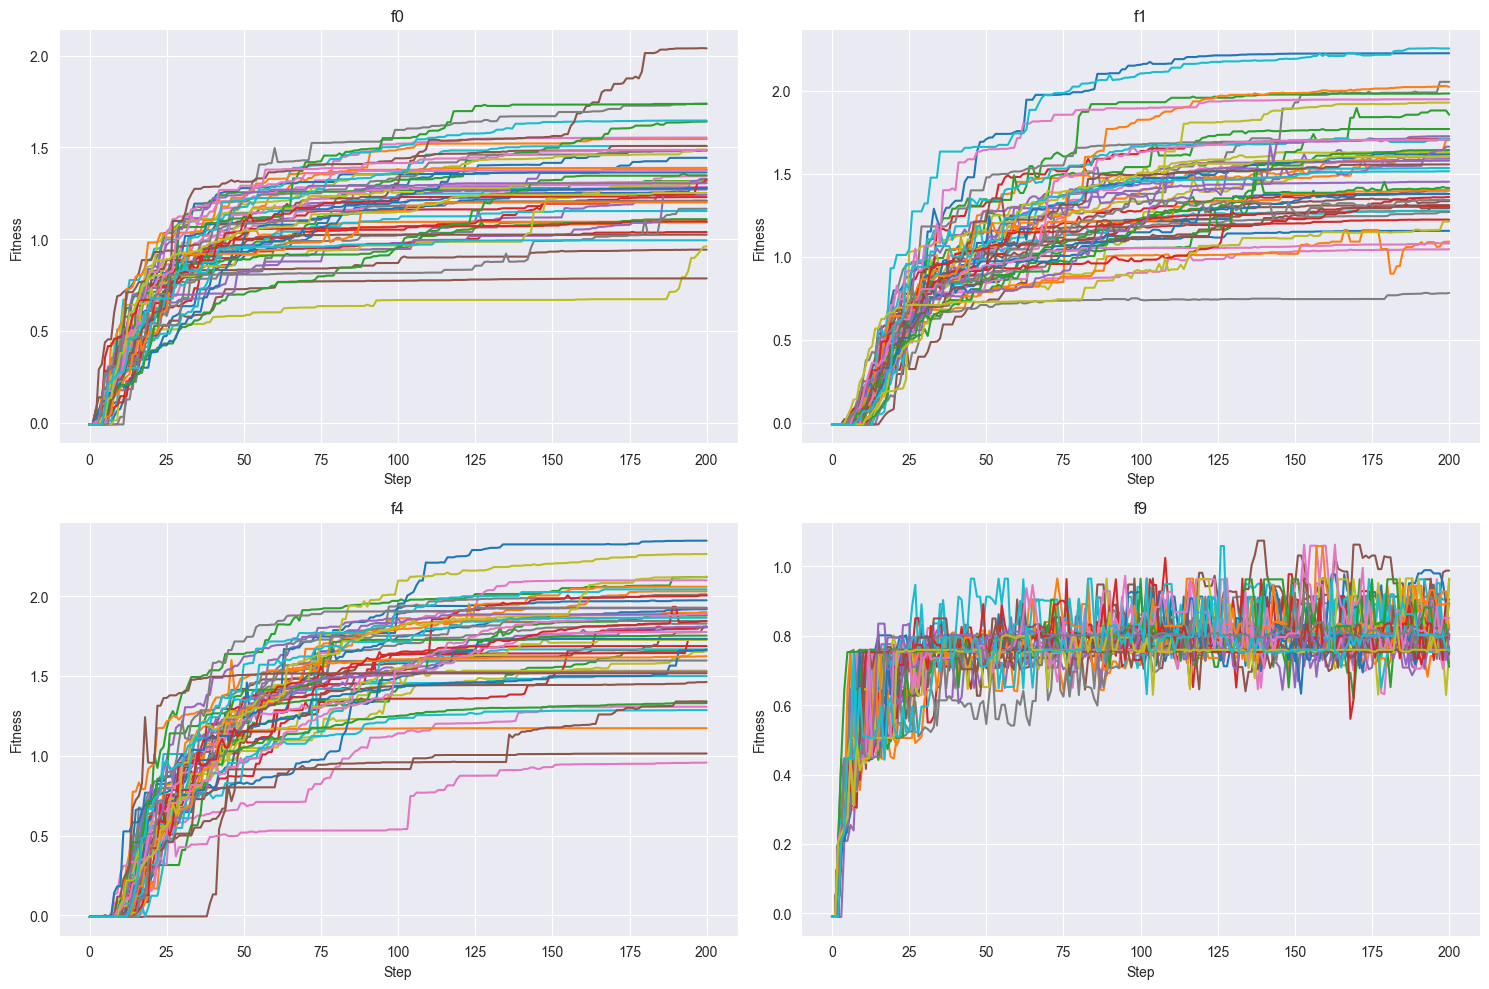

In [50]:
fig = plt.figure(figsize=(15,10))

i = 0

# colors = sns.color_palette("tab10", len(fitnesses))  # Generate colors
# fitness_colors = dict(zip(fitnesses, colors))

for representation in representations:
    i += 1

    ax = fig.add_subplot(2,2,i)
    ax.set_title(f'f{representation}')
    t_data = data[representation]

    for m in t_data['max']:
        ax.plot(m)

    ax.set_xlabel("Step")
    ax.set_ylabel("Fitness")

fig.tight_layout()

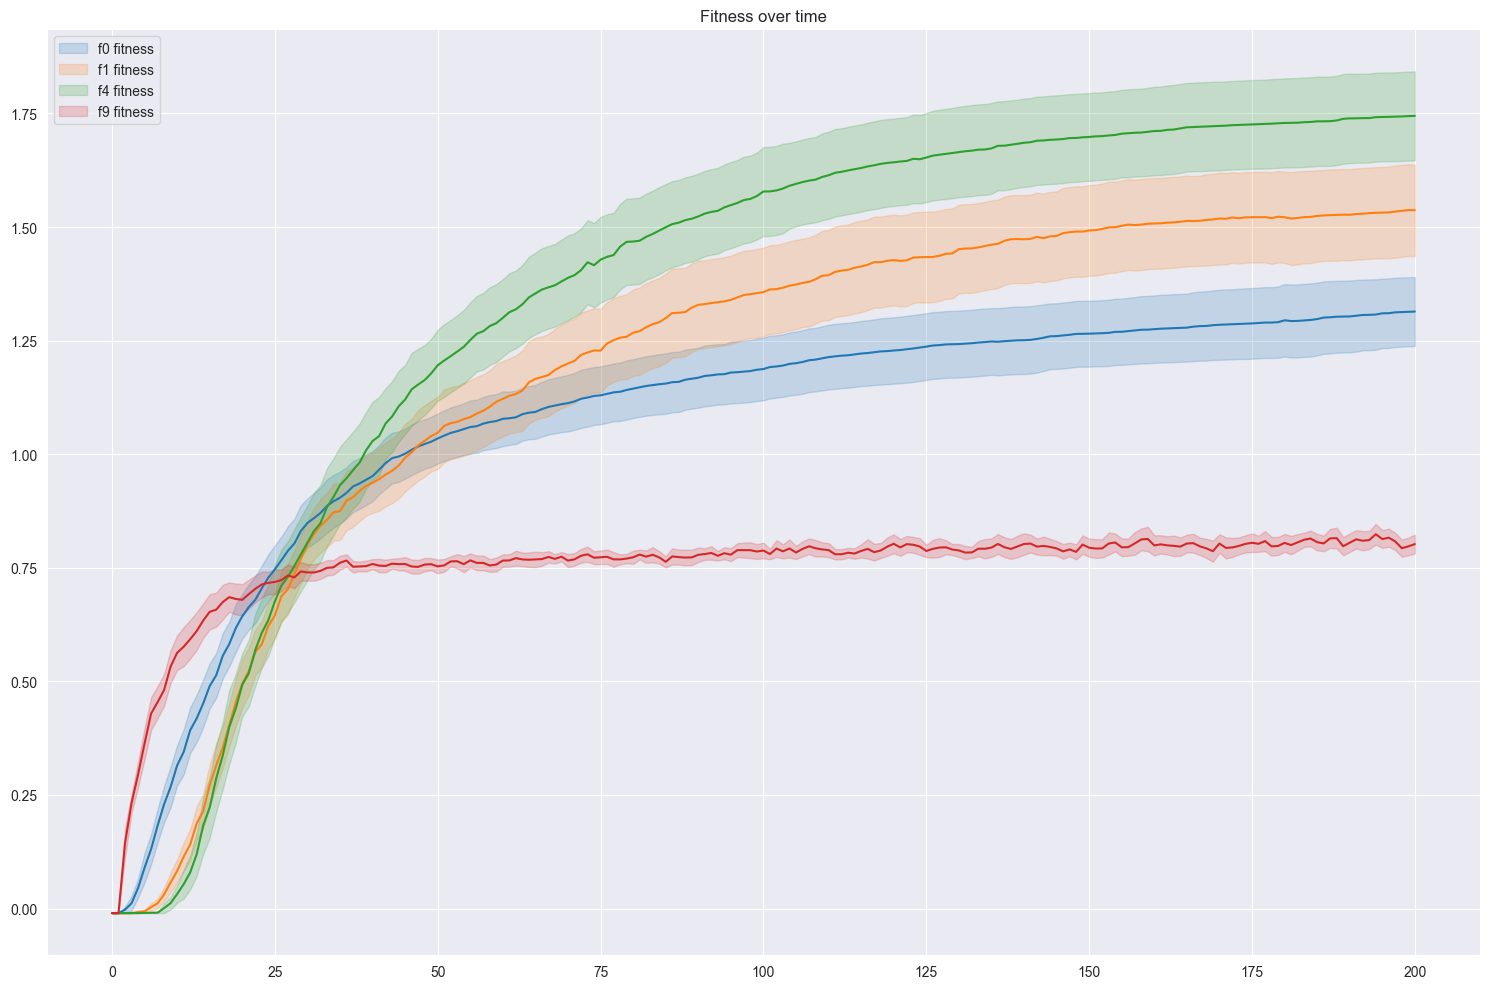

In [58]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1)
ax.set_title(f'Fitness over time')
for r in representations:

    t_data = data[r]
    max_data = np.array(t_data['max'])
    avg_mean = np.mean(max_data, axis=0)
    avg_std = np.std(max_data, axis=0) / 3

    lab = f"f{r} fitness"

    x = list(range(max_data.shape[1]))

    ax.plot(avg_mean, label=lab, color=representation_colors[r])
    ax.fill_between(x, avg_mean-avg_std, avg_mean+avg_std, alpha=0.2, label=lab, color=representation_colors[r])

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

fig.tight_layout()



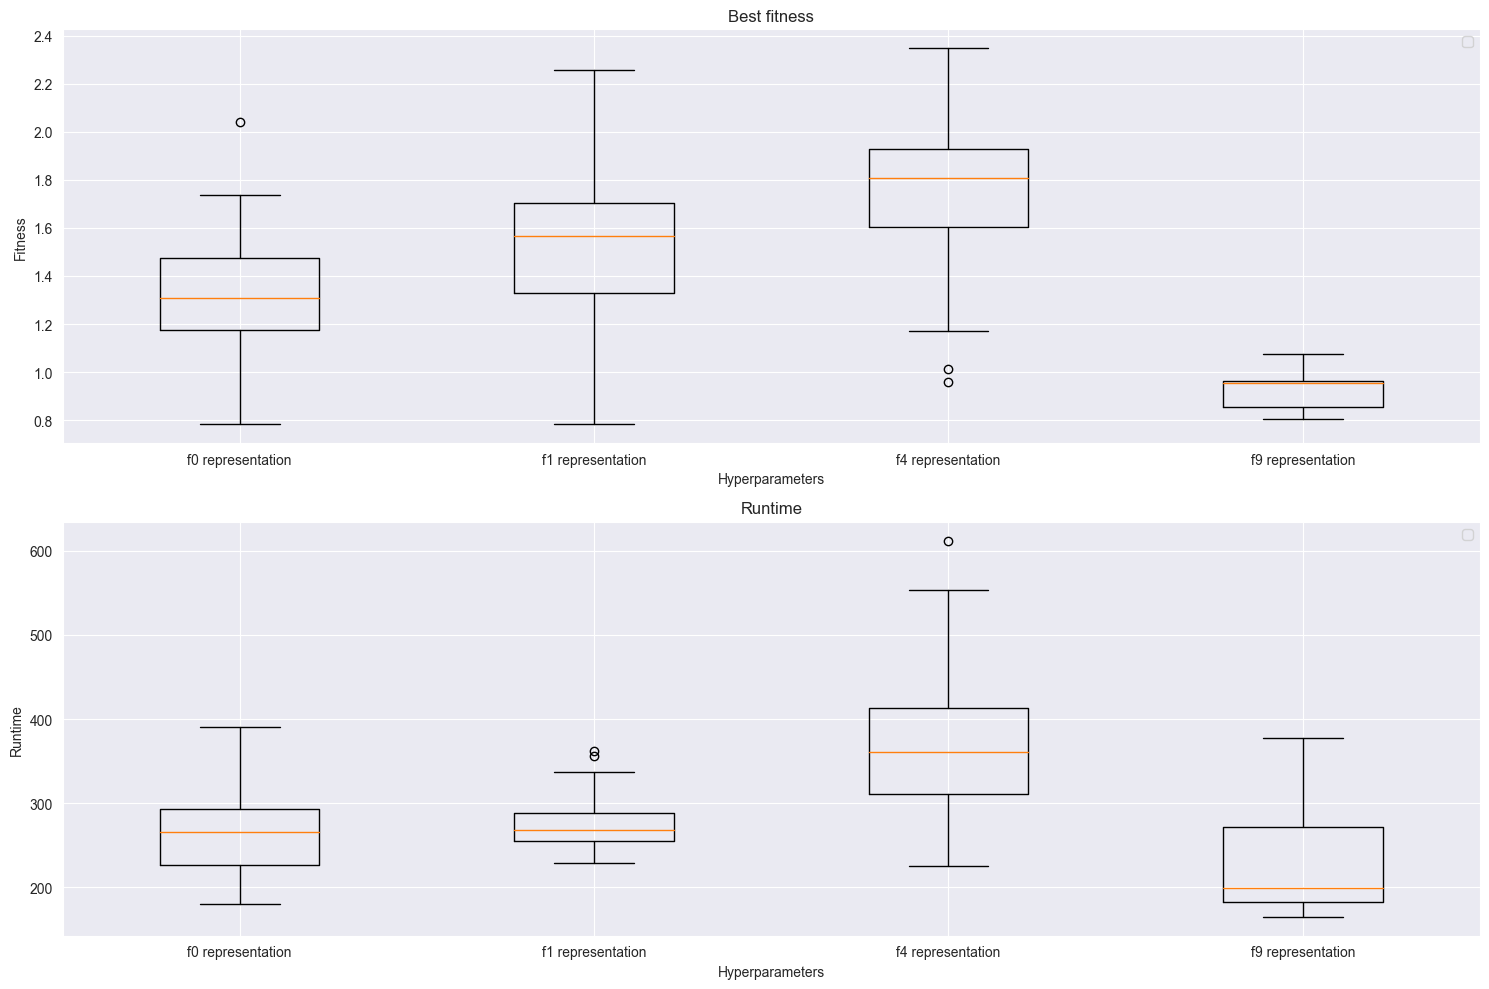

In [57]:
fig = plt.figure(figsize=(15, 10))

i = 0

y = []
x = []
labs = []

i += 1
ax = fig.add_subplot(2,1,i)
ax.set_title('Best fitness')

for r in representations:

    t_data = data[r]
    max_data = np.array(t_data['max'])
    max_es = np.max(max_data, axis=1)

    lab = f"f{r} representation"
    labs.append(lab)

    y.append(max_es)
    if len(x) == 0:
        x.append(1)
    else:
        x.append(x[-1] + 1)

ax.boxplot(y,positions=x, labels=labs)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_ylabel('Fitness')
ax.set_xlabel('Hyperparameters')


y = []
x = []
labs = []

i += 1
ax = fig.add_subplot(2,1,i)
ax.set_title('Runtime')

for r in representations:

    t_data = data[r]
    r_data = np.array(t_data['runtime'])

    lab = f"f{r} representation"
    labs.append(lab)

    y.append(r_data)
    if len(x) == 0:
        x.append(1)
    else:
        x.append(x[-1] + 1)

ax.boxplot(y,positions=x, labels=labs)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_ylabel('Runtime')
ax.set_xlabel('Hyperparameters')

fig.tight_layout()
